In [332]:
import pandas as pd
import bz2
from tqdm import tqdm 
import json

In [333]:
responses = []
with bz2.BZ2File('data/banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [01:18, 2547.67it/s]


In [334]:
responses[2]

{'city': 'г. Москва',
 'rating_not_checked': False,
 'title': 'Двойное списание за один товар.',
 'num_comments': 1,
 'bank_license': 'лицензия № 2562',
 'author': 'Vladimir84',
 'bank_name': 'Бинбанк',
 'datetime': '2015-06-05 20:14:28',
 'text': 'Здравствуйте! \xa0Дублирую свое заявление от 03.06.2015 в ДО "Можайский". \xa002.06.2015 мною, по моей дебетовой карте была совершена покупка в интернет-магазине \xa0на сумму 3028 руб., но с карты произошло двойное списание (два раза по 3028 руб.) то есть 6056 руб. (о чем имеются смс сообщения от банка). Интернет-магазин подтвердил только один платеж 3028 руб. , товар был получен 05.06.2015. Прошу разобраться в ситуации и вернуть мне на счет ошибочно списанную сумму в размере 3028 руб.!  \xa0С уважением, давний клиент Вашего банка Владимир. Номер карты указан в моем заявлении в\xa0ДО "Можайский".',
 'rating_grade': None}

In [335]:
data = pd.read_json('data/banki_responses.json', lines=True)
data.head()

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Воронеж,True,Ипотека на 5+,0,лицензия № 1623,e.novikova,ВТБ 24,2015-06-08 11:06:56,Здравствуйте! Хотелось бы выразить благодарно...,5.0
1,г. Казань,True,ЗВОНКИ СОСЕДЯМ,0,лицензия № 2289,KZN\Vorontsova_NA,Русский Стандарт,2015-06-06 18:17:52,Уважаемые представители департамента по работе...,2.0
2,г. Санкт-Петербург,True,Ложная информация!!!!,0,лицензия № 2307,Evgenia15,Союз,2015-06-07 19:08:33,Здравствуйте. Столкнулась с такой ситуацией. в...,2.0
3,г. Москва,True,Банкомат не зачислил деньги на счет,1,лицензия № 2557,dolgov.work,Ситибанк,2015-06-07 19:22:00,1 июня 2015 в Москве в отделении по адресу Смо...,1.0
4,г. Волгоград,True,Невозможно закрыть карту 2(два)!!!,0,лицензия № 3354,copLine,Ренессанс Кредит,2015-06-08 14:54:55,История очень долгая! Пришел я в банк (это раз...,1.0


In [336]:
# Токенизируем документы в слова
texts = [[text for text in doc.split()] for doc in data['text']]

In [337]:
texts[1][:5]

['Уважаемые', 'представители', 'департамента', 'по', 'работе']

In [338]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('russian'))
#stop_words

In [339]:
!pip3 install pymystem3 

In [340]:
from pymystem3 import Mystem
from string import punctuation

#Create lemmatizer and stopwords list
mystem = Mystem() 

#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stop_words\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = tokens
    
    return text

In [341]:
lemmatized_word = []

for text in tqdm(data['text'][:50000]):
    lemmatized_word.append(preprocess_text(text))

100%|██████████| 50000/50000 [06:16<00:00, 132.95it/s]


In [342]:
print(lemmatized_word[:1])

[['здравствовать', 'хотеться', 'выражать', 'благодарность', 'банка', 'втб24', 'г', 'воронеж', 'пл', 'ленин', 'непосредственно', 'специалист', 'ипотечный', 'кредитование', 'мещерякова', 'юлия', 'анатольевна', 'это', 'второй', 'ипотека', 'банк', 'специалист', 'вопрос', 'подача', 'документ', 'быстрый', 'принятие', 'решение', 'одобрение', 'весь', 'необходимый', 'сумма', 'никакой', 'проблема', 'выдача', 'кредит', 'удобно', 'никуда', 'нужно', 'ходить', 'сторонний', 'организация', 'нужно', 'договариваться', 'оценка', 'сотрудник', 'банк', 'приезжать', 'вовремя', 'страховка', 'оформлять', 'выдача', 'кредит', 'отделение', 'банк', 'быстро', 'четко', 'слаженно', 'весь', 'вопрос', 'сравнение', 'условие', 'юлия', 'подробно', 'отвечать', 'сомнение', 'никакой', 'возникать', 'именно', 'банк', 'брать', 'выбор', 'сбербанк', 'втб24', 'дополнительный', 'расход', 'выдача', 'кредит', 'страховка', 'являться', 'обязательный', 'условие', 'оформление', 'ипотека', 'также', 'оформлять', 'карта', 'привилегия', 'бес

In [343]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    min_count=5, #игнорировать все слова с частотой встречаемости меньше, чем это значение.
    window=2,#размер контекстного окна,
    size=300,# размер векторного представления слова (word embedding)
    #negative=10,#сколько неконтекстных слов учитывать в обучении, используя negative sampling
    alpha=0.03,#начальный learning_rate, используемый в алгоритме обратного распространения ошибки (Backpropogation)
    min_alpha=0.0007,#минимальное значение learning_rate, на которое может опуститься в процессе обучения.
    sample=6e-5,
    sg=1)#если 1, то используется реализация Skip-gram; если 0, то CBOW

In [344]:
#получаем словарь
w2v_model.build_vocab(lemmatized_word)

In [345]:
#обучаем модель
w2v_model.train(lemmatized_word, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(96241846, 200772150)

In [346]:
#тест на определение ближайших слов
w2v_model.wv.most_similar(positive=['банк'])

[('банка', 0.6841657161712646),
 ('клиент', 0.5701491832733154),
 ('ваш', 0.5411436557769775),
 ('это', 0.5333799719810486),
 ('сотрудник', 0.5233070850372314),
 ('данный', 0.5232632160186768),
 ('который', 0.507941484451294),
 ('сбербанк', 0.5052288174629211),
 ('также', 0.4930907189846039),
 ('мусаеливать', 0.4811330735683441)]

In [347]:
#тест на определение ближайших слов
w2v_model.wv.most_similar(positive=['кредит'])

[('потребительский', 0.6555289030075073),
 ('досрочно', 0.5416913628578186),
 ('взять', 0.5395115613937378),
 ('брать', 0.5312644839286804),
 ('/*****/', 0.5262742042541504),
 ('страховка', 0.5143093466758728),
 ('погасить', 0.5118131637573242),
 ('ипотека', 0.5054517984390259),
 ('нецелевой', 0.500637412071228),
 ('дельтакредитбанк', 0.49938738346099854)]

In [348]:
#тест на определение ближайших слов
w2v_model.wv.most_similar(positive=['спасибо'])

[('улыбчивость', 0.5669089555740356),
 ('благодарность', 0.5350053310394287),
 ('радушие', 0.5281632542610168),
 ('добродушие', 0.5252663493156433),
 ('терпеливость', 0.5237180590629578),
 ('мерси', 0.5234512090682983),
 ('уважение', 0.5216819047927856),
 ('назель', 0.5080745816230774),
 ('лисконог', 0.5059533715248108),
 ('ладимир', 0.5032975077629089)]

In [349]:
#тест на аналогии (мужчина – король : женщина – королева)
w2v_model.wv.most_similar(positive=['банк','спасибо'], negative=['кредит'], topn=1)

[('бережный', 0.5041903257369995)]

In [350]:
#тест на аналогии (мужчина – король : женщина – королева)
w2v_model.wv.most_similar(positive=['брать','проблема'], negative=['удобно'], topn=1)

[('взять', 0.52569580078125)]

In [351]:
#тест на определение лишнего слова
w2v_model.wv.doesnt_match('банк кредит спасибо сумма'.split())

/home/user/.local/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'спасибо'

In [352]:
from sklearn.manifold import TSNE
from nltk import FreqDist
top_words = []

fd = FreqDist()
for s in tqdm(lemmatized_word):
    fd.update(s)
    
for w in fd.most_common(100):
    top_words.append(w[0])
    
print(top_words[:50])

100%|██████████| 50000/50000 [00:02<00:00, 17232.87it/s]

['банк', 'карта', 'это', 'день', 'деньги', 'кредит', 'сотрудник', 'который', 'клиент', 'весь', 'счет', 'отделение', 'свой', 'мочь', 'сумма', 'год', 'сказать', 'вклад', 'получать', 'вопрос', 'заявление', 'ваш', 'время', 'договор', 'данный', '...', 'платеж', 'номер', 'кредитный', 'приходить', 'телефон', 'ответ', 'звонок', 'средство', 'офис', 'обращаться', 'звонить', 'т', '2', '2014', 'рубль', 'очень', 'сбербанк', 'месяц', 'проблема', 'работа', 'решать', 'человек', 'написать', 'позвонить']


In [353]:
top_words_vec = w2v_model.wv[top_words]

In [354]:
top_words_vec

array([[ 0.04613007,  0.04459209, -0.07386838, ..., -0.1362506 ,
        -0.08422638, -0.01845568],
       [-0.04875102, -0.14390807, -0.02261432, ..., -0.18585436,
        -0.05232408, -0.01877123],
       [ 0.05078507, -0.10358379, -0.12431097, ..., -0.08414678,
        -0.09487431, -0.11266005],
       ...,
       [ 0.01003263, -0.00237855, -0.03728877, ...,  0.05328216,
        -0.10605656, -0.03505208],
       [-0.09153721, -0.15295322, -0.1016771 , ..., -0.01629253,
        -0.1010586 ,  0.05046107],
       [-0.0736649 ,  0.00964922, -0.0797689 , ..., -0.20445105,
        -0.0183744 ,  0.05421363]], dtype=float32)

In [355]:
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [356]:
!pip3 install bokeh

In [357]:
import matplotlib.pyplot as plt

from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook

output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
          toolbar_location="above",
          title="word2vec T-SNE top-100")


source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0], 
                                    x2=top_words_tsne[:,1], 
                                    names=top_words))

p.scatter(x="x1",y="x2",size=8, source=source)

labels=LabelSet(x="x1", y="x2", text='names', x_offset=5, y_offset=5, source=source, text_align='center')



p.add_layout(labels)

show(p)

Loading BokehJS ...

Строим 2D-проекцию выбранных слов с добавлением векторов отношений между парами 

In [358]:
df = pd.concat((pd.Series(top_words).rename('word'), pd.DataFrame(w2v_model.wv[top_words])), axis=1).set_index('word')
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
word,,,,,,,,,,,,,,,,,,,,,
банк,0.046130,0.044592,-0.073868,0.124253,0.003300,-0.152158,0.001685,0.008825,0.050550,0.065682,...,-0.012444,-0.161351,-0.079931,0.017301,0.226394,-0.046765,0.016123,-0.136251,-0.084226,-0.018456
карта,-0.048751,-0.143908,-0.022614,0.104310,0.024553,-0.171028,-0.291904,-0.084623,0.050406,0.037579,...,0.071475,-0.156220,0.192562,0.100347,0.204380,0.149746,-0.027411,-0.185854,-0.052324,-0.018771
это,0.050785,-0.103584,-0.124311,-0.066582,-0.064964,-0.166374,0.046495,-0.021418,-0.137522,0.030356,...,-0.005652,-0.039876,0.123810,-0.038924,0.012785,0.044581,0.136585,-0.084147,-0.094874,-0.112660
день,0.154044,0.021135,-0.135374,-0.032830,0.153689,-0.133226,-0.264993,-0.067460,0.095806,0.021136,...,-0.168334,-0.045906,-0.077460,-0.090436,0.256447,0.092342,0.052235,0.152525,-0.249262,-0.162793
деньги,0.064742,0.142912,-0.093490,0.113010,0.126747,-0.157729,-0.289537,-0.148386,0.029687,0.048781,...,0.140579,-0.109676,0.044720,0.049681,0.174482,-0.077875,-0.049126,-0.141600,0.014545,-0.080066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
закрывать,-0.209491,0.319186,0.014409,0.082359,-0.096857,-0.153914,-0.120014,0.198805,0.052973,0.006779,...,0.020467,-0.120566,0.074894,0.230303,0.120253,-0.005698,0.074285,-0.069340,0.001512,0.246273
ничто,0.082694,-0.081583,-0.071540,-0.087366,-0.208428,-0.174030,0.067681,0.023649,-0.139843,0.141841,...,0.143949,-0.249146,0.099513,0.077472,0.014337,0.006716,0.168697,-0.069616,0.062566,0.056793
сайт,0.010033,-0.002379,-0.037289,-0.011136,0.120118,-0.308011,0.099020,-0.035759,0.135442,0.220641,...,-0.107763,-0.176642,-0.083210,0.069861,-0.040143,-0.014528,-0.217130,0.053282,-0.106057,-0.035052


In [359]:
df.loc['деньги']

0      0.064742
1      0.142912
2     -0.093490
3      0.113010
4      0.126747
         ...   
295   -0.077875
296   -0.049126
297   -0.141600
298    0.014545
299   -0.080066
Name: деньги, Length: 300, dtype: float32

In [367]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_word_pairs(word_pairs, method="PCA"):
    words = list(set([w for pair in word_pairs for w in pair]))
    dfs = df.loc[words].copy()
    
    if method=="PCA":
        d = PCA(n_components=2)
    elif method=="TSNE":
        d = TSNE(n_components=2)
        
    results = d.fit_transform(dfs.iloc[:,:100])
    dfs['x'] = results[:,0]
    dfs['y'] = results[:,1]

    fig = plt.figure(figsize=(15,8), dpi=300)
    ax = fig.add_subplot(1,1,1)
    colors = plt.cm.tab10.colors
    for i in range(len(dfs)):
        ax.scatter(
            x=dfs.iloc[i]["x"],
            y=dfs.iloc[i]["y"],
            alpha=0.9,
            c=np.array([colors[i%10]])
        )
        ax.text(
            x=dfs.iloc[i]["x"],
            y=dfs.iloc[i]["y"],
            s=words[i],
            color=colors[i%10]
        )

    for pair in word_pairs: 
        w1, w2 = pair
        w1x, w1y = dfs.loc[w1]["x"], dfs.loc[w1]["y"]
        w2x, w2y = dfs.loc[w2]["x"], dfs.loc[w2]["y"]
        vec = np.array([[w1x, w1y, w2x-w1x, w2y-w1y]])
        X, Y, U, V = zip(*vec)
        ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.002, color=colors[0])    
    plt.show()

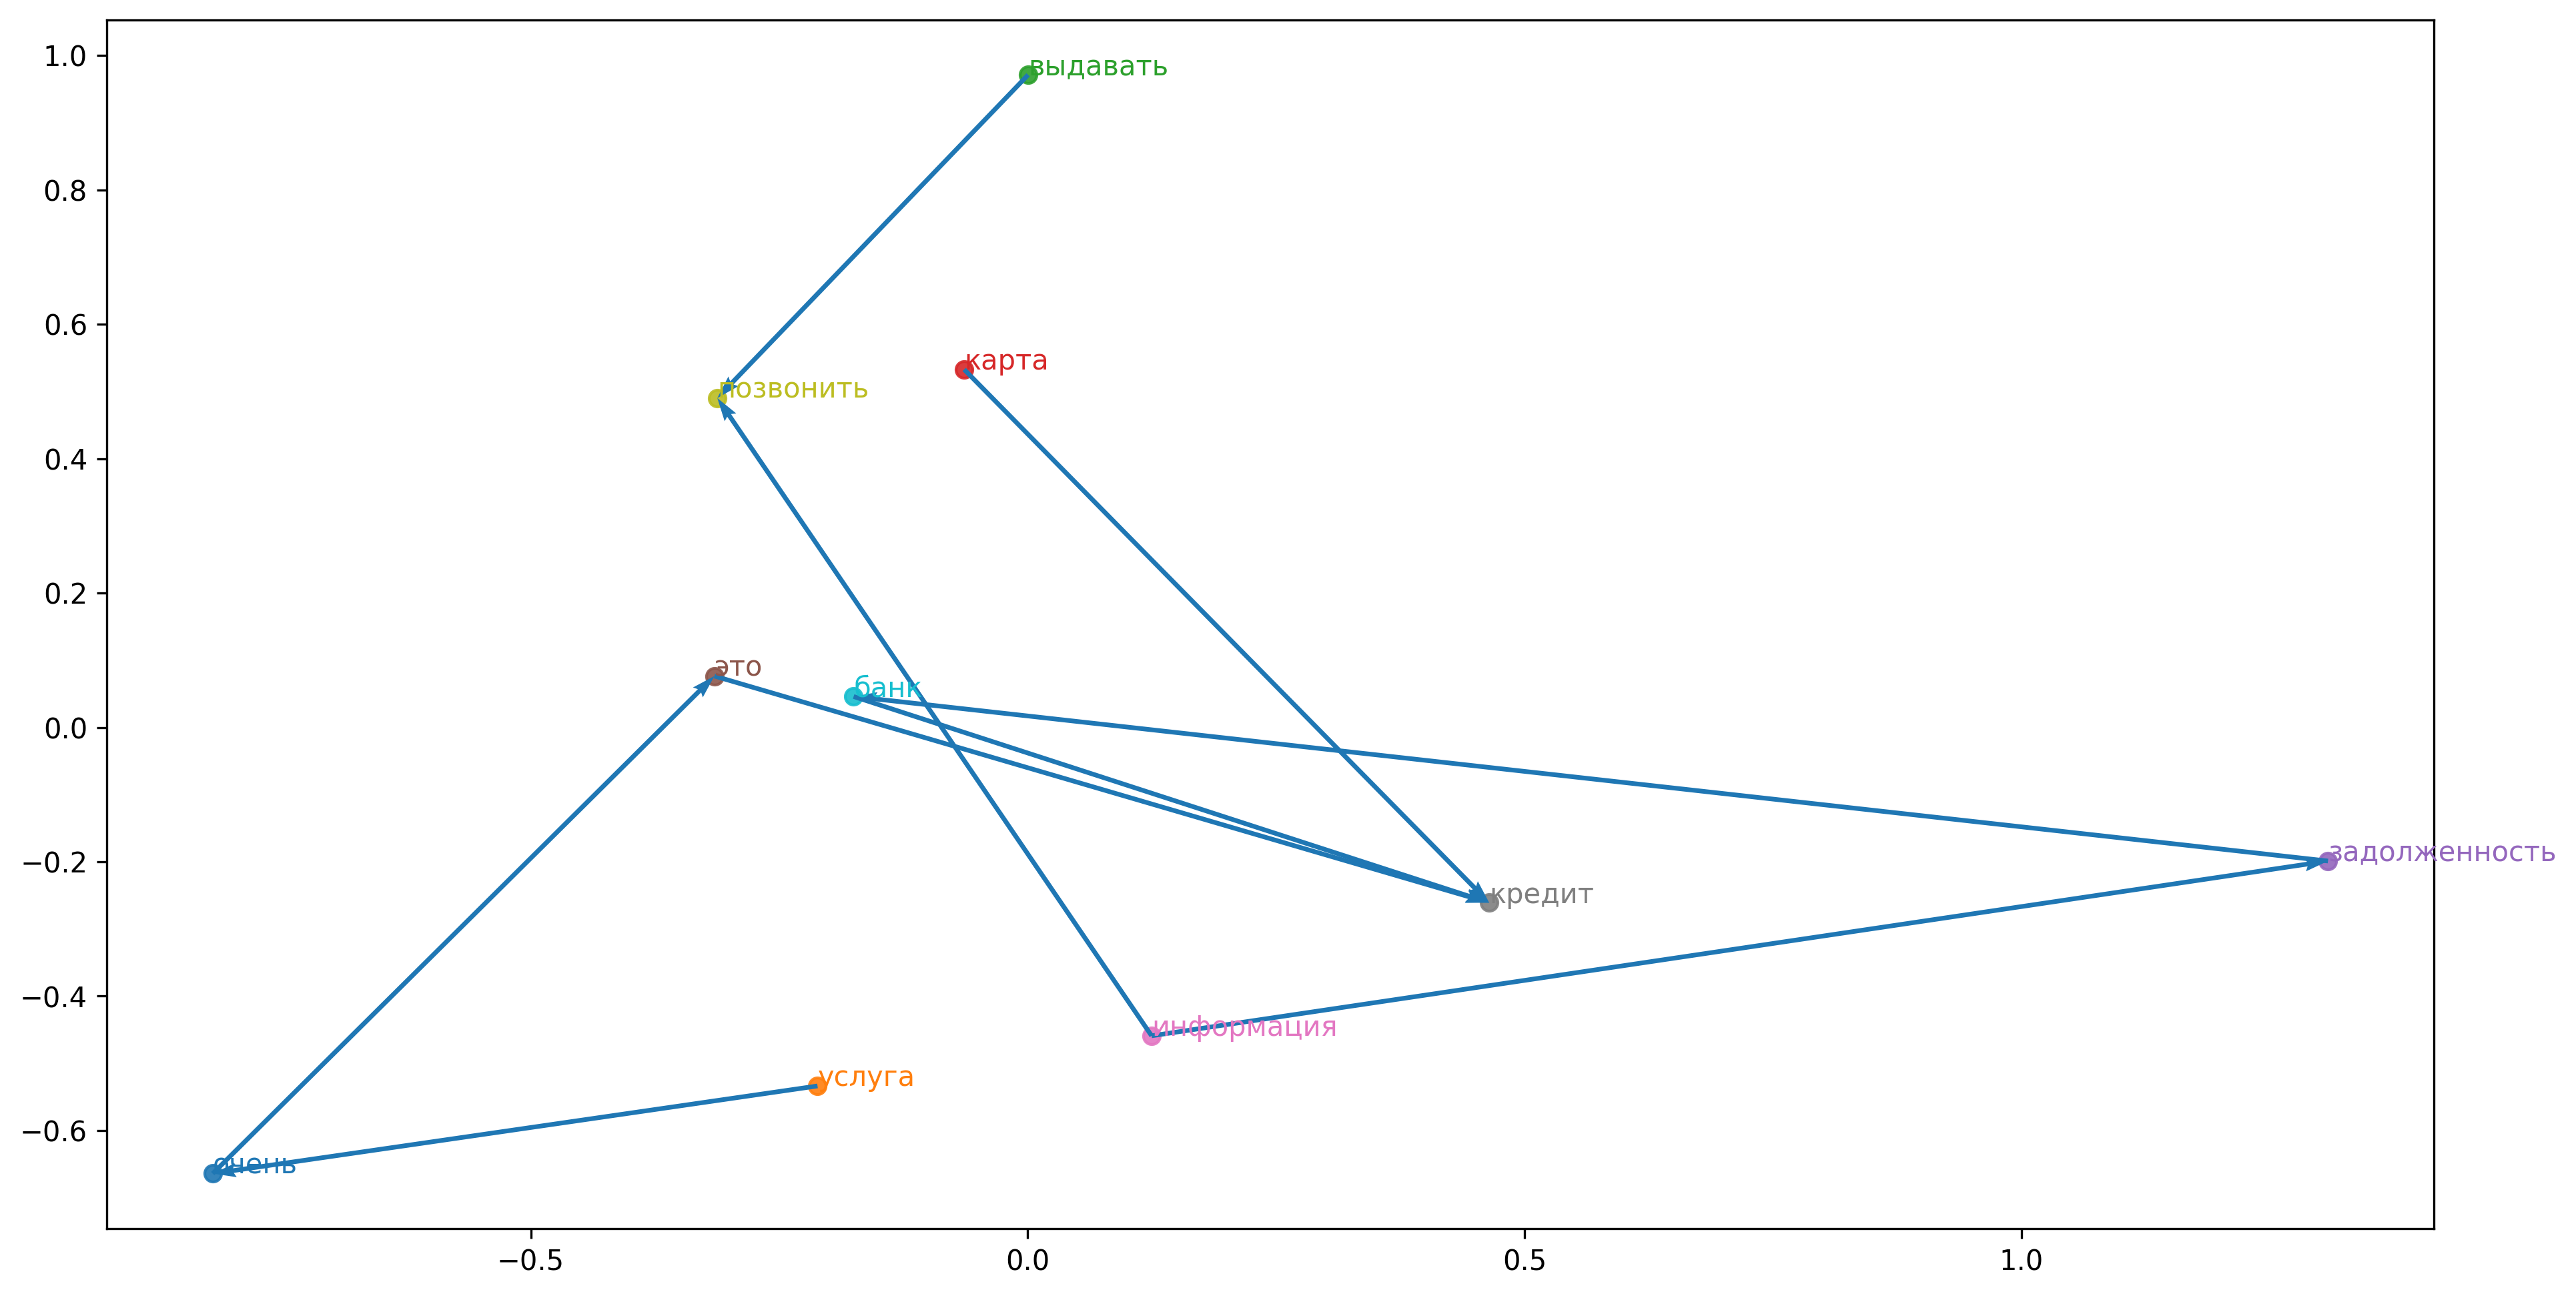

In [368]:
word_pairs = [
    ("услуга", "очень"), 
    ("информация", "позвонить"),
    ("банк", "кредит"),
    ("задолженность", "банк"),
    ("выдавать", "позвонить"),
    ("карта", "кредит"),
    ("очень", "это"),
    ("это", "кредит"),
    ("информация", "задолженность"),


]

plot_word_pairs(word_pairs, method="PCA")